In [1]:
%load_ext autoreload
%autoreload 3

import modules.data_preparation as data_prep
import modules.measures as measures
import modules.constants as const
import modules.statistics as stat
import pandas as pd
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import pandas as pd

In [2]:
ADAPT_TO_MIO_OBJECTIVES = True

In [3]:
neutrality_volume_values = pd.read_csv("store2/neutrality_volume_measure_df_with_objectives.csv")

if ADAPT_TO_MIO_OBJECTIVES:
    neutrality_volume_values = pd.merge(neutrality_volume_values, data_prep.get_mio_runs()[const.OBJECTIVE].drop_duplicates(), on=const.OBJECTIVE)

neutrality_volume_values

,Fitness function,Objective,Neutrality volume
0,Branch distance,de.arnowelzel.android.periodical0,177
1,Branch distance,de.arnowelzel.android.periodical0,222
2,Branch distance,de.arnowelzel.android.periodical0,359
3,Branch distance,de.arnowelzel.android.periodical0,294
4,Branch distance,de.arnowelzel.android.periodical0,153
...,...,...,...
51995,Code-based fitness,de.drhoffmannsoftware347,104
51996,Code-based fitness,de.drhoffmannsoftware347,92
51997,Code-based fitness,de.drhoffmannsoftware347,91
51998,Code-based fitness,de.drhoffmannsoftware347,110


In [4]:
data_points_rq1 = len(neutrality_volume_values.index)

# Results RQ1

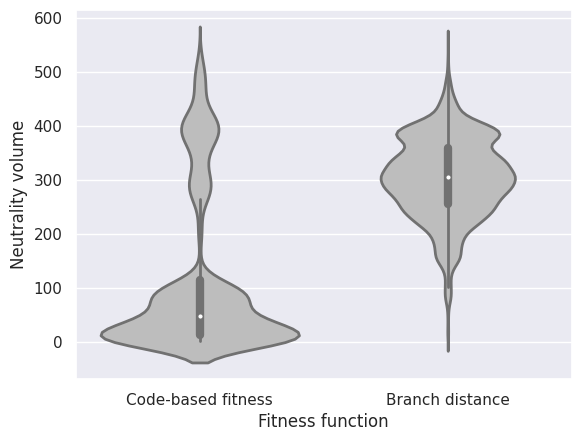

In [5]:
output_file = Path(const.DIAGRAM_OUT_PATH) / (const.NEUTRALITY_VOLUME + ".pdf")
sns.set_theme(style="darkgrid")

fig = plt.figure()
ax = sns.violinplot(data=neutrality_volume_values, x=const.FITNESS_FUNCTION, y=const.NEUTRALITY_VOLUME, linewidth=2, color="#bdbdbd", order=[const.CODE_BASED, const.BRANCH_DISTANCE])
plt.savefig(output_file)
plt.close(fig)
fig

# RQ2

In [6]:
for index, row in neutrality_volume_values.groupby([const.FITNESS_FUNCTION, const.OBJECTIVE]).aggregate(lambda l: len(l)).iterrows():
    assert row[const.NEUTRALITY_VOLUME] == 20

In [7]:
objectives = neutrality_volume_values['Objective'].drop_duplicates()
fitness_functions = [const.CODE_BASED, const.BRANCH_DISTANCE]

neutrality_volume_dict_ps = {}

for objective in objectives:
    branch_distance_list = neutrality_volume_values[(neutrality_volume_values[const.FITNESS_FUNCTION] == const.BRANCH_DISTANCE) & (neutrality_volume_values[const.OBJECTIVE] == objective)][const.NEUTRALITY_VOLUME]
    code_based_list = neutrality_volume_values[(neutrality_volume_values[const.FITNESS_FUNCTION] == const.CODE_BASED) & (neutrality_volume_values[const.OBJECTIVE] == objective)][const.NEUTRALITY_VOLUME]
    assert len(branch_distance_list) == 20
    assert len(code_based_list) == 20
    neutrality_volume_dict_ps[objective] = stat.calculate_mann_whitney_p_value(list(code_based_list), list(branch_distance_list))

In [8]:
print(len(list(neutrality_volume_dict_ps.keys())))

statistics_tuples = list(neutrality_volume_dict_ps.values())
p_values_not_none = [x[0] for x in statistics_tuples if x[0] is not None]

if ADAPT_TO_MIO_OBJECTIVES:
    assert len(p_values_not_none) == 1300
else:
    assert len(p_values_not_none) == 2607

print("p_values not none: " + str(len(p_values_not_none)))
print("of all: " + str(len(statistics_tuples)))

1300
p_values not none: 1300
of all: 1300


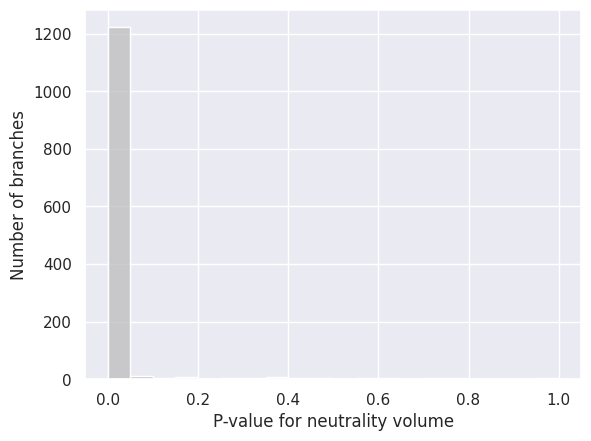

In [9]:
from matplotlib import pyplot as plt

import modules.constants as const
from pathlib import Path
import seaborn as sns

output_file = Path(const.DIAGRAM_OUT_PATH) / "neutrality_volume_p-values.pdf"

sns.set_theme(style="darkgrid")



fig = plt.figure()
sns.histplot(p_values_not_none, binwidth=0.05, color="#bdbdbd")
plt.xlabel("P-value for neutrality volume")
plt.ylabel("Number of branches")

plt.savefig(output_file)
plt.close(fig)

fig

significant: 1222
insignificant: 78


<Figure size 640x480 with 0 Axes>

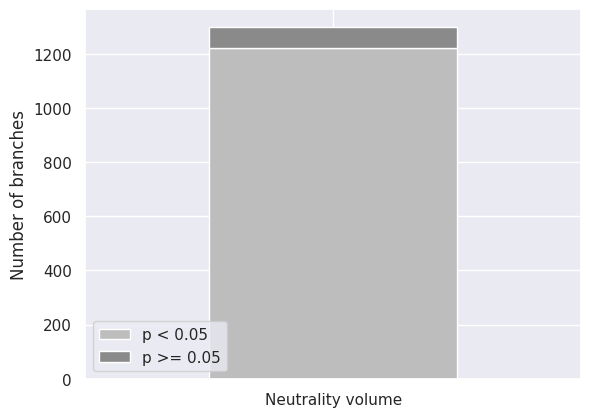

In [10]:
p_values_significant = [x for x in p_values_not_none if x < 0.05]
p_values_insignificant = [x for x in p_values_not_none if x >= 0.05]

assert len(p_values_not_none) == len(p_values_significant) + len(p_values_insignificant)

fig = plt.figure()

number_significant = len(p_values_significant)
number_insignificant = len(p_values_insignificant)

barplot_data_dict = {"p < 0.05": [number_significant], "p >= 0.05": [number_insignificant]}
barplot_data_df = pd.DataFrame(barplot_data_dict, index=["Neutrality volume"])

# sns.barplot(data=barplot_data_df, color="#bdbdbd")

barplot_data_df.plot(kind='bar', stacked=True, color=["#bdbdbd", '#8a8a8a', 'green'])
plt.ylabel("Number of branches")
plt.xticks(rotation=0)

plt.savefig(Path(const.DIAGRAM_OUT_PATH) / "neutrality_volume_p-values_two-bins.pdf")
plt.close(fig)

print("significant: " + str(len(p_values_significant)))
print("insignificant: " + str(len(p_values_insignificant)))

fig

In [11]:
effect_size_values = [x[1] for x in statistics_tuples if x[0] is not None]
effect_size_values_not_none = [x for x in effect_size_values if x is not None]
print("not none: " + str(len(effect_size_values_not_none)))
print("of all: " + str(len(effect_size_values)))
print("for #p_values: " + str(len(p_values_not_none)))

not none: 1300
of all: 1300
for #p_values: 1300


In [12]:
effect_size_values_not_none_significant = [x[1] for x in statistics_tuples if x[0] is not None and x[0] < 0.05 and x[1] is not None]
effect_size_values_not_none_insignificant = [x[1] for x in statistics_tuples if x[0] is not None and x[0] >= 0.05 and x[1] is not None]
assert len(effect_size_values_not_none) == len(effect_size_values_not_none_significant) + len(effect_size_values_not_none_insignificant)

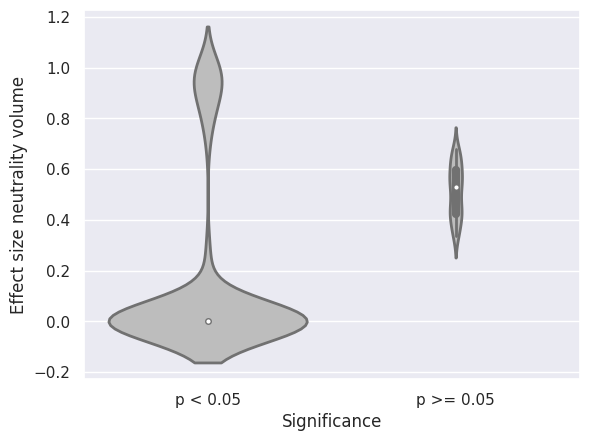

In [13]:
sns.set_theme(style="darkgrid")

x_axis = "Significance"
y_axis = "Effect size neutrality volume"

list_of_tuples = []
for size in effect_size_values_not_none_significant:
    list_of_tuples.append(("p < 0.05", size))
for size in effect_size_values_not_none_insignificant:
    list_of_tuples.append(("p >= 0.05", size))

effect_sizes_df = pd.DataFrame(list_of_tuples, columns=[x_axis, y_axis])

fig = plt.figure()
sns.violinplot(data=effect_sizes_df, x=x_axis, y=y_axis, linewidth=2, color="#bdbdbd", order=["p < 0.05", "p >= 0.05"], scale="count")
plt.savefig(Path(const.DIAGRAM_OUT_PATH) / "neutrality_volume_effect_size.pdf")
plt.close(fig)
fig

In [14]:
effect_sizes_sig = effect_sizes_df.query("Significance=='p < 0.05'")
effect_sizes_sig_smaller = effect_sizes_sig.query("`Effect size neutrality volume` < 0.5 and `Effect size neutrality volume` >= @measures.machine_epsilon")
effect_sizes_sig_greater = effect_sizes_sig.query("`Effect size neutrality volume` > 0.5")
effect_sizes_sig_zero = effect_sizes_sig.query("`Effect size neutrality volume` < @measures.machine_epsilon")

number_zero = len(effect_sizes_sig_zero.index)
number_smaller = len(effect_sizes_sig_smaller.index)
number_greater = len(effect_sizes_sig_greater.index)

print(str(len(effect_sizes_sig.index)))
print(str(number_zero))
print(str(number_smaller))
print(str(number_greater))

assert len(effect_sizes_sig.index) == number_zero + number_smaller + number_greater

1222
975
53
194


<Figure size 640x480 with 0 Axes>

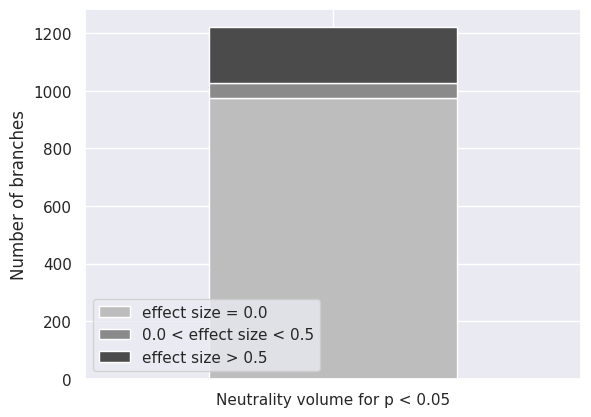

In [15]:
fig = plt.figure()

barplot_data_dict = {"effect size = 0.0": [number_zero], "0.0 < effect size < 0.5": [number_smaller], "effect size > 0.5": [number_greater]}
barplot_data_df = pd.DataFrame(barplot_data_dict, index=["Neutrality volume for p < 0.05"])

# sns.barplot(data=barplot_data_df, color="#bdbdbd")

barplot_data_df.plot(kind='bar', stacked=True, color=["#bdbdbd", '#8a8a8a', "#4b4b4b"])
plt.ylabel("Number of branches")
plt.xticks(rotation=0)

plt.savefig(Path(const.DIAGRAM_OUT_PATH) / "neutrality_volume_effect_size_two-bins.pdf")
plt.close(fig)

fig

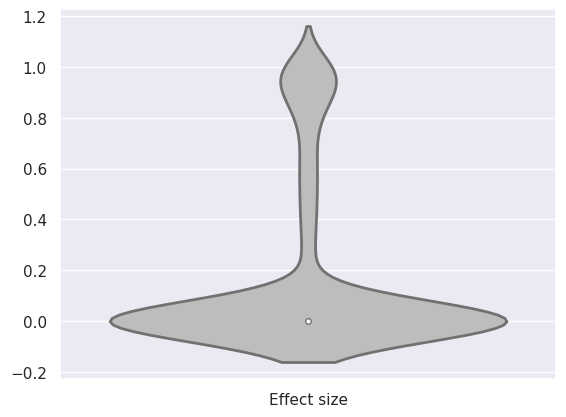

In [16]:
sns.set_theme(style="darkgrid")

effect_size_values_not_none_df = pd.DataFrame(effect_size_values_not_none, columns=["Effect size"])

fig = plt.figure()
sns.violinplot(data=effect_size_values_not_none_df, linewidth=2, color="#bdbdbd")
plt.savefig(Path(const.DIAGRAM_OUT_PATH) / "neutrality_volume_effect-size_aggregated.pdf")
plt.close(fig)
fig